# Week 1 - Sampling

In this notebook we will cover the basics about

1. Definition of probabilities
2. Probability distributions
3. Sampling

We will first get an intuition about probabilities.

Suppose that we are on the hunt for H pylori.  We want to test to see if a particular patient has this strain of H pylori based on their fecal samples.

We can abstract this scenario to visualize balls in a bucket.  There are two types of balls, red balls and blue balls.  The H pylori bacteria can be represented by red balls, and all of the other balls present bacteria that aren't H pylori.  

So if 10% of the bacteria are H pylori, then 10% of the balls in the bucket are red.

Since 10% of the balls are red, that means that when a ball is drawn out of the bucket, the probability of drawing a red ball is 10%.  We can simulate this to show this using the [numpy.random.choice](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function.

What we will do below, is define a bucket with only 9 blue balls and 1 red ball.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bucket = ['red', 'blue', 'blue', 'blue', 'blue', 
          'blue', 'blue', 'blue', 'blue', 'blue']

/Users/mortonjt/miniconda3/envs/bio/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Now we have defined a bucket, we will randomly draw balls from it.
But once we draw a bucket, we will observe it, and place it back into bucket. 
This is known as [sampling with replacement](https://en.wikipedia.org/wiki/Simple_random_sample).

Below, we will draw 1 ball from the bucket, and repeat this 10 times.

In [2]:
np.random.seed(1) # set random seed
draws = np.random.choice(bucket, size=10)
draws

array(['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue',
       'blue', 'blue'], 
      dtype='<U4')

As you can see, most of the balls we have draw are blue.
Let's plot a histogram of the balls we have observed

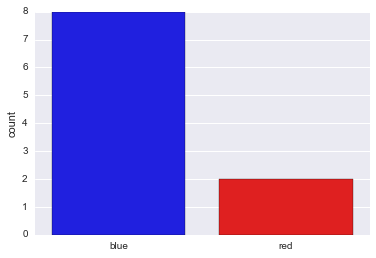

In [3]:
fig, ax = plt.subplots()
sns.countplot(draws, ax=ax, palette={'red':'r', 'blue':'b'})

If we draw 1000 balls, we get most closer to actual proportion of red balls.

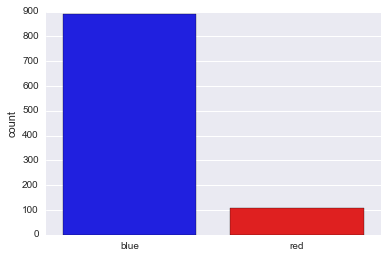

In [4]:
draws = np.random.choice(bucket, size=1000)

fig, ax = plt.subplots()
sns.countplot(draws, ax=ax, palette={'red':'r', 'blue':'b'})

We can see about 10% of the balls are red, and 90% of the balls are blue.

If we could only draw 10 samples with replacement at a time, we have a distribution of possible outcomes.

There is a possibility that only the red ball was choosen, but there is only 1 outcome that permits that.  On the other hand, there are many outcomes that permit the possibility of picking only blue balls.

This brings up the notion of a binomial distribution.  This distribution describes the probability of drawing a particular subsample.  

As discussed before, expectation, variance and probability mass functions are as follows

Expectation: $\mathbb{E}[x] = np$

Variance: $\mathbb{E}[x] = np(1-p)$

Probability mass function: $P(x=k) = {n \choose k} p^k (1-p)^{n-k}$

If we were repeatedly draw 10 balls with replacement out of this bucket, it would look like this.



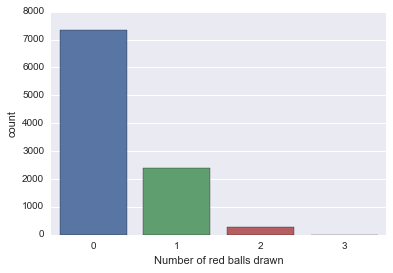

In [5]:
fig, ax = plt.subplots()

samples = np.random.binomial(3,         # number of draws with replacement
                             p=0.1,     # proportion of red balls
                             size=10000 # number of samples to simulate
                             )
sns.countplot(samples, ax=ax)
plt.xlabel('Number of red balls drawn')

As shown, even with 10000 simulated samples, there was no sample where all of the balls were red.  This is because the probability of drawing only red balls is extremely small.

Specifically it is

$P(10\ red) = \frac{1}{10}\frac{1}{10}\frac{1}{10} = (\frac{1}{10}) ^ {3}$

Now, what if we instead of replacing the ball, we permanently remove the drawn ball from the bucket.

In [6]:
np.random.seed(1) # set random seed
draws = np.random.choice(bucket, size=3, replace=False)
draws

array(['blue', 'blue', 'blue'], 
      dtype='<U4')

Now, this is concept is completely different from sampling with replacement.  

If we wanted to observe all of the possible number of samples, using the sampling without replacement scheme, we would need to use another distribution.  The [Hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

Let's simulate a bunch of random samples using this distribution.

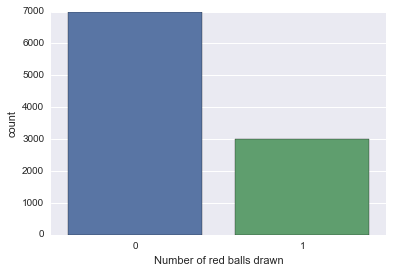

In [7]:
fig, ax = plt.subplots()

samples = np.random.hypergeometric(ngood=1,      # number of blue balls
                                   nbad=9,       # number of red balls
                                   nsample=3,    # number of draws per sample
                                   size=10000    # number of samples to simulate
                                   )
sns.countplot(samples, ax=ax)
plt.xlabel('Number of red balls drawn')

As noted, we get a very different distribution of samples, compared to the sampling with replacement scheme.

Let's go back to a more realistic H pylori example.

The average person has on the order of $10^{12}$ microbial cells in their gut.  When researchers measure microbial DNA from a human subject, they are subsampling from a fecal sample, which is already a very tiny subsample of the microbial cells in gut.

Say a fecal sample has $10^3$ cells, and we have sequenced DNA from $10^2$  cells.  And 10% of the cells in the original sample are H pylori cells.  Because we are doing destructive sampling, we are no longer sampling with replacement, we are sampling without replacement.

Let's try to simulate this, first doing sampling without replacement

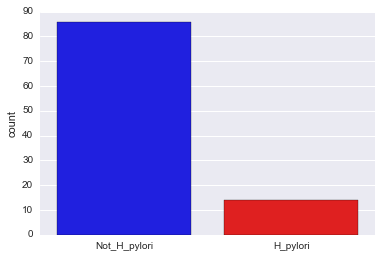

In [8]:
Hpylori = ['H_pylori']*100
not_Hpylori = ['Not_H_pylori']*900

bucket = Hpylori + not_Hpylori
draws = np.random.choice(bucket, size=100, replace=False)

fig, ax = plt.subplots()
sns.countplot(draws, ax=ax, palette={'H_pylori':'r', 'Not_H_pylori':'b'})

Now, note how similar this was to the sampling with replacement diagram above.

Similar to before, we wanted to observe all of the possible number of samples, using the sampling without replacement scheme, we would need to use another distribution.  The [Hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

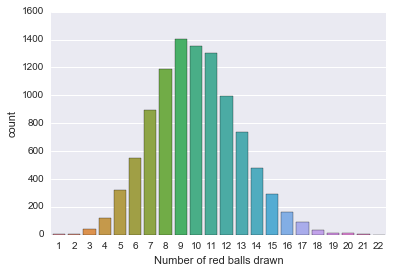

In [9]:
fig, ax = plt.subplots()

samples = np.random.hypergeometric(ngood=len(Hpylori),    # number of H pylori cells in original sample
                                   nbad=len(not_Hpylori), # number of non H pylori cells in original sample
                                   nsample=100,           # number of draws per sample
                                   size=10000             # number of samples to simulate
                                   )
sns.countplot(samples, ax=ax)
plt.xlabel('Number of red balls drawn')

Now, let's repeat this, except using the binomial distribution we discussed before.

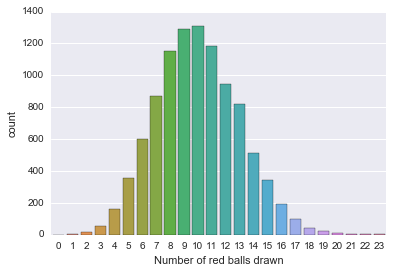

In [10]:
fig, ax = plt.subplots()

samples = np.random.binomial(100,       # number of draws with replacement
                             p=0.1,     # proportion of red balls
                             size=10000 # number of samples to simulate
                             )
sns.countplot(samples, ax=ax)
plt.xlabel('Number of red balls drawn')

Note how similar the hypergeometric distribution is to the binomial distribution.


The main take away is, for our typical experiments, we are actually doing sampling without replacement.  
But when the number of total microbial cells drawn in each sample is high, the difference between sampling with replacement, and sampling without replacement is completely neglible.

For our experiments, we are typically not only interested in looking at just 1 bacteria, we want to look at all of the bacteria picked up by sequencing.  The [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) is an extension of the binomial distribution to handle more bacteria.  And the binomial distribution is said to be a marginal distribution of the multinomial distribution.

Expectation: $\mathbb{E}[x_i] = np_i$

Variance: $\mathbb{E}[x_i] = np_i(1-p_i)$

# Fun topic: rarefaction

If you want to estimate the proportion of microbes, it can be calculated through [Linearity of Expectation](https://en.wikipedia.org/wiki/Expected_value)

Now we can actually calculate the expectation of the proportion estimate $\hat{p} = \frac{x_i}{n}$ where $x_i$ is a binomial random variable as follows

$\mathbb{E}[\hat{p_i}] = \mathbb{E}[\frac{x_i}{n}] = \frac{np_i}{n} = p_i$

Now, if we wanted to estimate the variance of this estimate, it uses the property $V[ax] = a^2 V[x]$

$V[\hat{p_i}] = V[\frac{x_i}{n}] = \frac{V[x_i]}{n^2} = \frac{np_i(1-p_i)}{n^2} = \frac{p_i(1-p_i)}{n}$

So the estimate of the proportions of microbes gets better as there are more balls sampled.
The main controversy behind rarefaction is random subsampling makes this estimate of the proportions crappier, which could propogate into downstream analyses.